## Keras model - DenseNet 
---- 

* **features**

> **DenseNet implementation**
> - Two Dense block 
> - Change loss function  :  MSE, MAE  $\rightarrow$ Logcosh 


In [9]:
import numpy as np 
import pickle 

# load dataset 
# with open('../sample_image/sample560_crop_df.bin', 'rb') as f :
#     crop_img = pickle.load(f)

with open('../sample_image/final_df.bin', 'rb') as f :
    crop_img = pickle.load(f)

    
# X = np.array([i for i in crop_img.crop_img_03])
X = np.array([i for i in crop_img.crop_images])
y = crop_img.weight.values

idx = list(np.random.choice(range(len(X)), int(len(X) * 0.8), replace=False))
test_idx = list(set(list(range(len(X)))) - set(idx))

X_train = X[idx]
y_train = y[idx]

X_test = X[test_idx]
y_test = y[test_idx]

In [10]:
X.shape

(560, 250, 550, 3)

### Parameters 

In [1]:
BATCH_SIZE = 24 
OPTIMIZER = ["adagrad", "adadelta", "adam", "adamax", "rmsprob"]

### Model Architecture

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.engine.input_layer import Input
from keras.models import Model
from keras import regularizers 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate, AveragePooling2D, GlobalAveragePooling2D, Activation, concatenate
from keras.regularizers import l2


def DenseNet():
    
    inputs = Input(shape=(250, 550, 3))
    
    conv_1 = Conv2D(16, (7, 7), strides=2, padding='same')(inputs)
    act_1 = Activation('relu')(conv_1)
    max_pool = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(act_1)
    
    ##### DENSE BLOCK 1 #####
    
    bn_1 = BatchNormalization()(max_pool)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_1 = concatenate([act_2, max_pool], axis=-1)
    
    bn_1 = BatchNormalization()(merged_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_2 = concatenate([act_2, merged_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_2)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_3 = concatenate([act_2, merged_2], axis=-1)
    
    bn_1 = BatchNormalization()(merged_3)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_4 = concatenate([act_2, merged_3], axis=-1)
    
    ###### Transition layer 1 #####

    conv_1 = Conv2D(32, (1, 1), padding='same')(merged_4)
    act_1 = Activation('relu')(conv_1)
    avg_p_1 = AveragePooling2D(strides=2)(act_1)
    
    
    ##### DENSE BLOCK 2 #####
    
    bn_1 = BatchNormalization()(avg_p_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_1 = concatenate([act_2, avg_p_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_1)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_2 = concatenate([act_2, merged_1], axis=-1)
    
    bn_1 = BatchNormalization()(merged_2)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_3 = concatenate([act_2, merged_2], axis=-1)
    
    bn_1 = BatchNormalization()(merged_3)
    conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
    act_1 = Activation('relu')(conv_1)
    bn_2 = BatchNormalization()(act_1)
    conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
    act_2 = Activation('relu')(conv_2)
    merged_4 = concatenate([act_2, merged_3], axis=-1)
    
#     ###### Transition layer 2 #####

#     conv_1 = Conv2D(32, (1, 1), padding='same')(merged_4)
#     act_1 = Activation('relu')(conv_1)
#     avg_p_1 = AveragePooling2D(strides=2)(act_1)
    
    
#     ##### DENSE BLOCK 3 #####
    
#     bn_1 = BatchNormalization()(avg_p_1)
#     conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
#     act_1 = Activation('relu')(conv_1)
#     bn_2 = BatchNormalization()(act_1)
#     conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
#     act_2 = Activation('relu')(conv_2)
#     merged_1 =concatenate([act_2, avg_p_1], axis=-1)
    
#     bn_1 = BatchNormalization()(merged_1)
#     conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
#     act_1 = Activation('relu')(conv_1)
#     bn_2 = BatchNormalization()(act_1)
#     conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
#     act_2 = Activation('relu')(conv_2)
#     merged_2 =concatenate([act_2, merged_1], axis=-1)
    
#     bn_1 = BatchNormalization()(merged_2)
#     conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
#     act_1 = Activation('relu')(conv_1)
#     bn_2 = BatchNormalization()(act_1)
#     conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
#     act_2 = Activation('relu')(conv_2)
#     merged_3 =concatenate([act_2, merged_2], axis=-1)
    
#     bn_1 = BatchNormalization()(merged_3)
#     conv_1 = Conv2D(32, (1, 1), padding='same')(bn_1)
#     act_1 = Activation('relu')(conv_1)
#     bn_2 = BatchNormalization()(act_1)
#     conv_2 = Conv2D(8, (3, 3), padding='same')(bn_2)
#     act_2 = Activation('relu')(conv_2)
#     merged_4 =concatenate([act_2, merged_3], axis=-1)
    
    ## Dense Layer with GlobalAveragePooling
    
    global_avg_p = GlobalAveragePooling2D()(merged_4)
    denselayer = Dense(100, activation='elu', kernel_regularizer=l2(0.001))(global_avg_p)
    output = Dense(1)(denselayer)
    
    
    model = Model(inputs=[inputs], outputs=[output])
        
    return model 


In [17]:
from keras.utils.training_utils import multi_gpu_model
from keras.optimizers import Adam
from keras import losses

model = DenseNet()
op = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-10, decay=0.008, amsgrad=False)
# model = multi_gpu_model(model, gpus=2)

## loss func : Mean squared error --> mean absoulute error 
model.compile(loss=losses.logcosh, optimizer=op, metrics=['mae'])

In [18]:
%%time
hist = model.fit(X_train, y_train, epochs=51, batch_size=24, validation_data=(X_test, y_test), verbose=2)

Train on 448 samples, validate on 112 samples
Epoch 1/51
 - 13s - loss: 62.1751 - mean_absolute_error: 62.7893 - val_loss: 17.8207 - val_mean_absolute_error: 18.4016
Epoch 2/51
 - 5s - loss: 13.6473 - mean_absolute_error: 14.2535 - val_loss: 13.2520 - val_mean_absolute_error: 13.8681
Epoch 3/51
 - 5s - loss: 12.7451 - mean_absolute_error: 13.3586 - val_loss: 9.6046 - val_mean_absolute_error: 10.2037
Epoch 4/51
 - 5s - loss: 9.9973 - mean_absolute_error: 10.6075 - val_loss: 47.4907 - val_mean_absolute_error: 48.1196
Epoch 5/51
 - 5s - loss: 6.0542 - mean_absolute_error: 6.6356 - val_loss: 12.1767 - val_mean_absolute_error: 12.7784
Epoch 6/51
 - 5s - loss: 4.6831 - mean_absolute_error: 5.2609 - val_loss: 25.0924 - val_mean_absolute_error: 25.7217
Epoch 7/51
 - 5s - loss: 3.8857 - mean_absolute_error: 4.4589 - val_loss: 10.8969 - val_mean_absolute_error: 11.5206
Epoch 8/51
 - 5s - loss: 4.5157 - mean_absolute_error: 5.1049 - val_loss: 5.4410 - val_mean_absolute_error: 6.0328
Epoch 9/51
 -

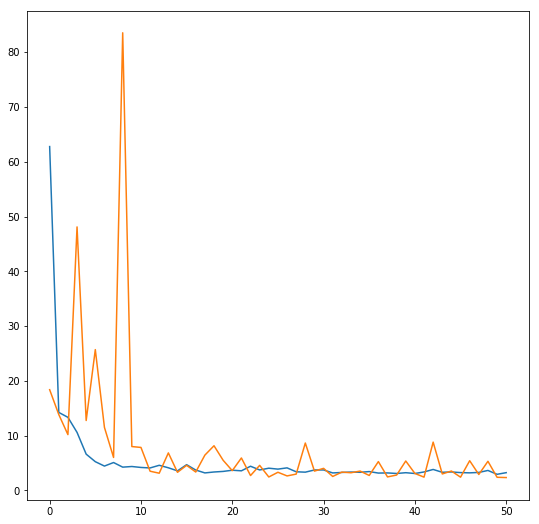

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
plt.plot(hist.history["mean_absolute_error"])
plt.plot(hist.history["val_mean_absolute_error"])
plt.show()

In [20]:
pred = model.predict(X_test)
for i, j in zip(pred, y_test):
    print("prediction : {}, Truth : {} ".format(i, j))

prediction : [96.99013], Truth : 95.69 
prediction : [126.64892], Truth : 124.51 
prediction : [126.520874], Truth : 125.38 
prediction : [94.710945], Truth : 92.77 
prediction : [115.58733], Truth : 125.53 
prediction : [97.101395], Truth : 91.66 
prediction : [126.84363], Truth : 128.98 
prediction : [113.69842], Truth : 120.29 
prediction : [123.84396], Truth : 122.88 
prediction : [96.65738], Truth : 93.89 
prediction : [124.48039], Truth : 129.03 
prediction : [127.08376], Truth : 128.82 
prediction : [126.6682], Truth : 126.05 
prediction : [126.78036], Truth : 128.0 
prediction : [121.111786], Truth : 120.34 
prediction : [96.89235], Truth : 96.27 
prediction : [124.79469], Truth : 124.27 
prediction : [125.384094], Truth : 120.82 
prediction : [123.15028], Truth : 121.72 
prediction : [95.34826], Truth : 96.7 
prediction : [95.05395], Truth : 91.35 
prediction : [94.84937], Truth : 92.98 
prediction : [94.381454], Truth : 99.25 
prediction : [95.061295], Truth : 99.67 
predicti

In [21]:
from keras.models import load_model
import pickle
import h5py

model.save('DenseNet_0725_51Epochs_logcosh.hdf5')
del model 